# Comparing pass managers
This notebook display graphs comparing
- Depth
- Depth ratio
- Time
- Cx gate count
- Total gate count
of all of the pass managers. 

It will also display a table summarizing the results and shows the percent different compared to sabre_v020 routing pass.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
import os

In [2]:
# Variables to change
qc_name = "ghz_2-127"
excluded_datasets = []

In [3]:
directory_path = f'data/{qc_name}'
files = [f for f in os.listdir(directory_path) if f.endswith('.csv') and f.replace('.csv', '') not in excluded_datasets]

datasets = {}
for file in files:
    dataset_path = os.path.join(directory_path, file)
    dataset_name = file.replace('.csv', '')
    datasets[dataset_name] = pd.read_csv(dataset_path)

# Sorting dataset names (excluding the reference dataset)
ref_dataset_name = 'sabre_v020'  # Change as needed
sorted_dataset_names = sorted([name for name in datasets.keys() if name != ref_dataset_name])

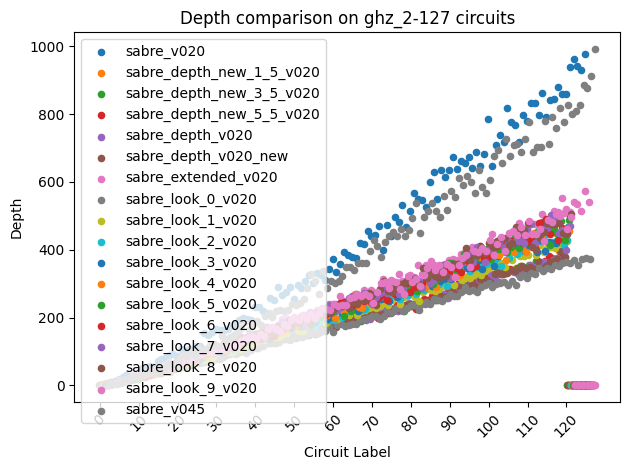

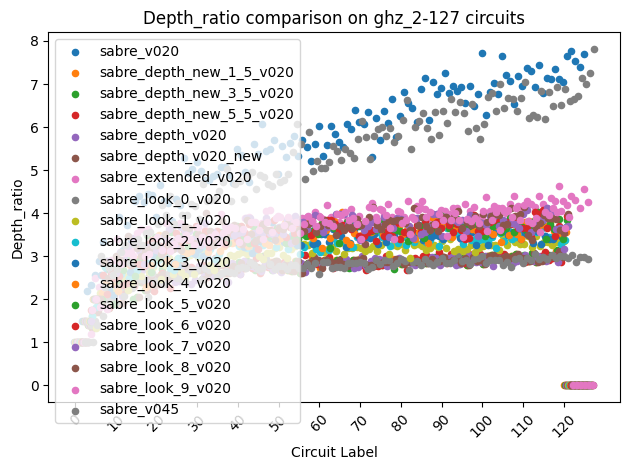

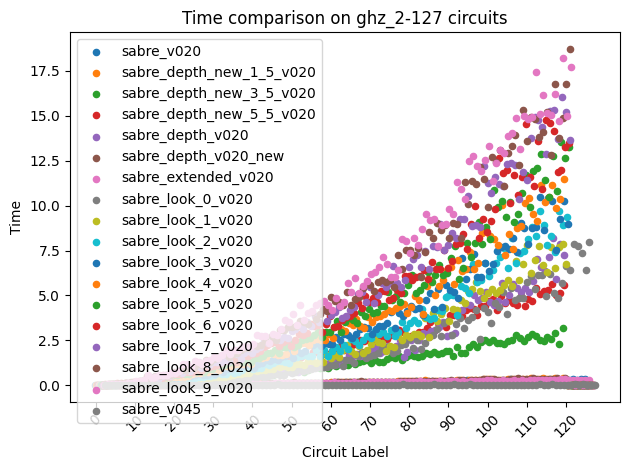

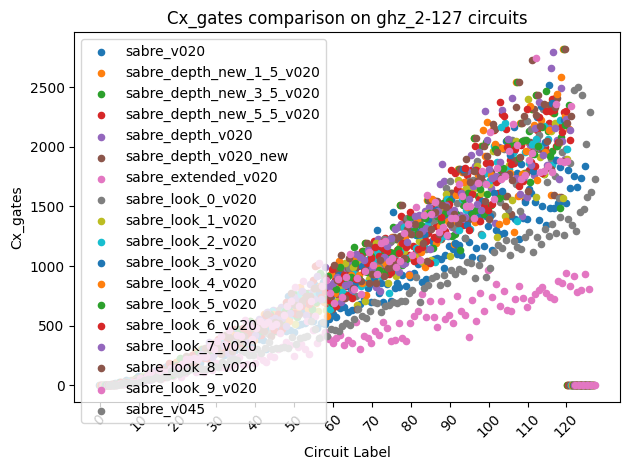

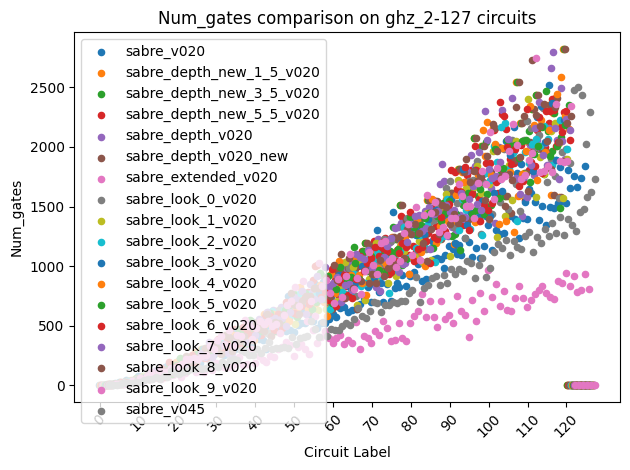

In [4]:


labels = list(set(sum([df['circuit label'].tolist() for df in datasets.values()], [])))
labels.sort()

x = np.arange(len(labels))
num_datasets = len(datasets) - 1  # excluding the reference dataset
shift = 0.15
shift_increment = (num_datasets * shift) / (num_datasets + 1)

# Plotting each attribute
attributes = ['depth', 'depth_ratio', 'time', 'cx_gates', 'num_gates']
for attribute in attributes:
    fig, ax = plt.subplots()

    # Plotting reference dataset separately
    ref_values = [ast.literal_eval(item)[attribute] for item in datasets[ref_dataset_name]['best_data']]
    ref_vals = [ref_values[datasets[ref_dataset_name]['circuit label'].tolist().index(label)] if label in datasets[ref_dataset_name]['circuit label'].tolist() else 0 for label in labels]
    ax.scatter(x - shift, ref_vals, label=ref_dataset_name, s=20)

    # Plotting other datasets
    for i, dataset_name in enumerate(sorted_dataset_names):
        df = datasets[dataset_name]
        values = [ast.literal_eval(item)[attribute] for item in df['best_data']]
        vals = [values[df['circuit label'].tolist().index(label)] if label in df['circuit label'].tolist() else 0 for label in labels]
        
        ax.scatter(x + (i + 1) * shift_increment, vals, label=dataset_name, s=20)

    # Setting labels and title
    ax.set_xlabel('Circuit Label')
    ax.set_ylabel(attribute.capitalize())
    ax.set_title(f'{attribute.capitalize()} comparison on {qc_name} circuits')

    # Setting ticks
    n = 10
    ax.set_xticks(x[::n])
    ax.set_xticklabels(labels[::n], rotation=45)

    ax.legend()
    fig.tight_layout()
    plt.show()



In [5]:
if ref_dataset_name not in datasets:
    raise ValueError(f"Reference dataset '{ref_dataset_name}' not found in the provided directory.")

attributes = ['depth', 'depth_ratio', 'time', 'cx_gates', 'num_gates']
avg_results = {attribute: [] for attribute in attributes}
sorted_dataset_names = sorted(datasets.keys())


for attribute in attributes:
    ref_values = [ast.literal_eval(item)[attribute] for item in datasets[ref_dataset_name]['best_data']]
    ref_avg = np.mean(ref_values)
    
    for dataset_name in sorted_dataset_names:
        if dataset_name == ref_dataset_name:
            continue

        df = datasets[dataset_name]
        values = [ast.literal_eval(item)[attribute] for item in df['best_data']]
        avg = np.mean(values)
        percent_diff = ((avg - ref_avg) / ref_avg) * 100

        avg_results[attribute].append([dataset_name, avg, percent_diff])


for attribute in avg_results:
    avg_comparison = pd.DataFrame(avg_results[attribute], columns=['Dataset', f'Average {attribute.capitalize()}', 'Percentage Difference (%)'])
    print(f"--- {attribute.capitalize()} Comparison ---")
    print(avg_comparison)
    print("\n")

--- Depth Comparison ---
                     Dataset  Average Depth  Percentage Difference (%)
0   sabre_depth_new_1_5_v020     181.200000                 -55.844196
1   sabre_depth_new_3_5_v020     181.216667                 -55.840135
2   sabre_depth_new_5_5_v020     181.366667                 -55.803582
3           sabre_depth_v020     180.275000                 -56.069605
4       sabre_depth_v020_new     181.200000                 -55.844196
5        sabre_extended_v020     257.206349                 -37.322554
6          sabre_look_0_v020     182.809524                 -55.451978
7          sabre_look_1_v020     201.558333                 -50.883166
8          sabre_look_2_v020     213.491667                 -47.975187
9          sabre_look_3_v020     218.208333                 -46.825804
10         sabre_look_4_v020     224.666667                 -45.252002
11         sabre_look_5_v020     229.283333                 -44.126987
12         sabre_look_6_v020     230.458333         

In [6]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


--- Depth Comparison ---
                     Dataset  Average Depth  Percentage Difference (%)
0   sabre_depth_new_1_5_v020     181.200000                 -55.844196
1   sabre_depth_new_3_5_v020     181.216667                 -55.840135
2   sabre_depth_new_5_5_v020     181.366667                 -55.803582
3           sabre_depth_v020     180.275000                 -56.069605
4       sabre_depth_v020_new     181.200000                 -55.844196
5        sabre_extended_v020     257.206349                 -37.322554
6          sabre_look_0_v020     182.809524                 -55.451978
7          sabre_look_1_v020     201.558333                 -50.883166
8          sabre_look_2_v020     213.491667                 -47.975187
9          sabre_look_3_v020     218.208333                 -46.825804
10         sabre_look_4_v020     224.666667                 -45.252002
11         sabre_look_5_v020     229.283333                 -44.126987
12         sabre_look_6_v020     230.458333         

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_45347/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


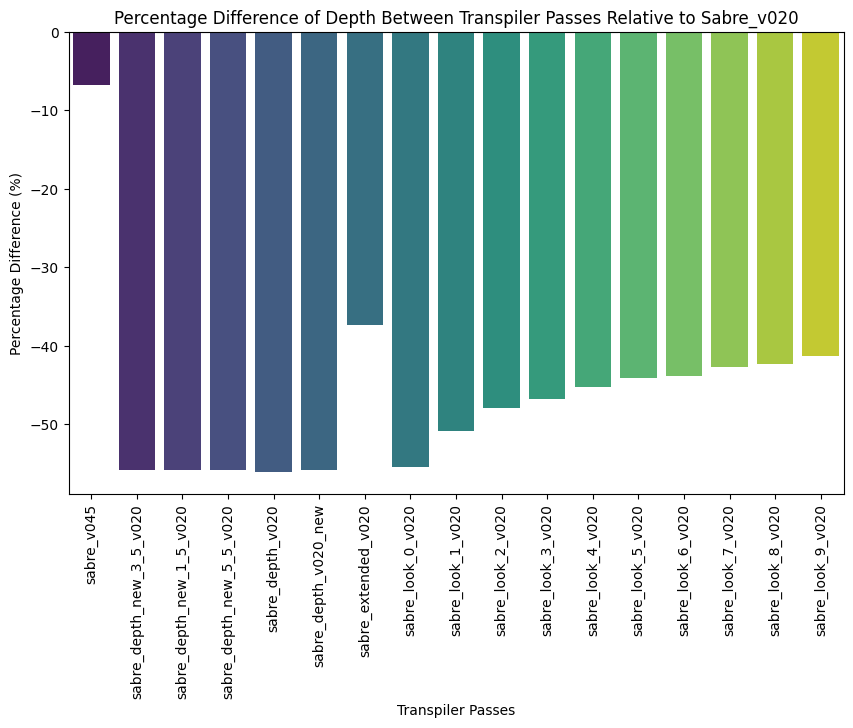

--- Depth_ratio Comparison ---
                     Dataset  Average Depth_ratio  Percentage Difference (%)
0   sabre_depth_new_1_5_v020             2.683833                 -51.987307
1   sabre_depth_new_3_5_v020             2.684833                 -51.969417
2   sabre_depth_new_5_5_v020             2.684917                 -51.967927
3           sabre_depth_v020             2.677417                 -52.102098
4       sabre_depth_v020_new             2.683833                 -51.987307
5        sabre_extended_v020             3.684444                 -34.086779
6          sabre_look_0_v020             2.671746                 -52.203544
7          sabre_look_1_v020             2.972917                 -46.815723
8          sabre_look_2_v020             3.160500                 -43.459933
9          sabre_look_3_v020             3.248417                 -41.887139
10         sabre_look_4_v020             3.326667                 -40.487279
11         sabre_look_5_v020             3.40

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_45347/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


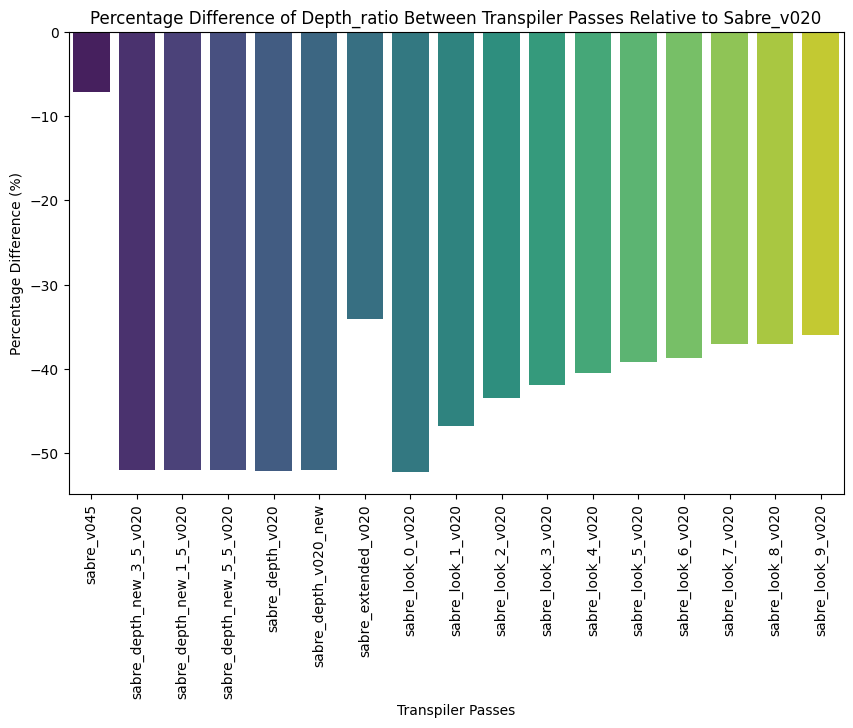

--- Time Comparison ---
                     Dataset  Average Time  Percentage Difference (%)
0   sabre_depth_new_1_5_v020      0.171421                   4.532072
1   sabre_depth_new_3_5_v020      1.194285                 628.271428
2   sabre_depth_new_5_5_v020      2.249196                1271.552753
3           sabre_depth_v020      2.066067                1159.881220
4       sabre_depth_v020_new      0.171742                   4.727940
5        sabre_extended_v020      0.152724                  -6.869232
6          sabre_look_0_v020      2.127299                1197.220337
7          sabre_look_1_v020      2.436179                1385.574677
8          sabre_look_2_v020      2.960360                1705.218557
9          sabre_look_3_v020      3.349005                1942.212942
10         sabre_look_4_v020      3.834203                2238.085329
11         sabre_look_5_v020      4.336168                2544.181846
12         sabre_look_6_v020      4.804367                2829.688

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_45347/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


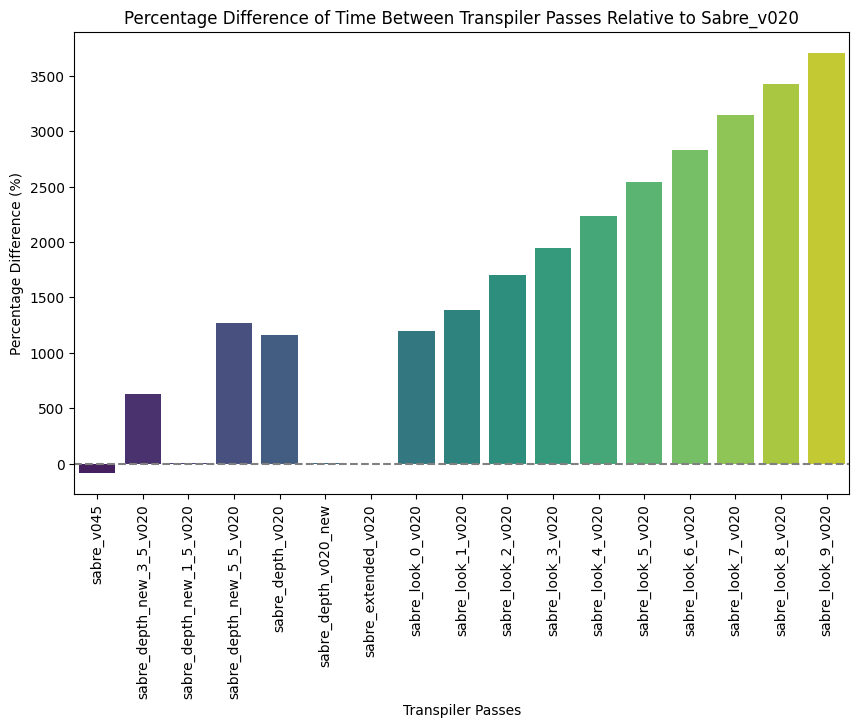

--- Cx_gates Comparison ---
                     Dataset  Average Cx_gates  Percentage Difference (%)
0   sabre_depth_new_1_5_v020        952.383333                  33.810926
1   sabre_depth_new_3_5_v020        949.858333                  33.456160
2   sabre_depth_new_5_5_v020        939.608333                  32.016024
3           sabre_depth_v020        938.158333                  31.812297
4       sabre_depth_v020_new        952.383333                  33.810926
5        sabre_extended_v020        411.333333                 -42.207206
6          sabre_look_0_v020        966.309524                  35.767571
7          sabre_look_1_v020        873.483333                  22.725387
8          sabre_look_2_v020        899.558333                  26.388954
9          sabre_look_3_v020        906.158333                  27.316261
10         sabre_look_4_v020        919.683333                  29.216539
11         sabre_look_5_v020        929.058333                  30.533737
12        

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_45347/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


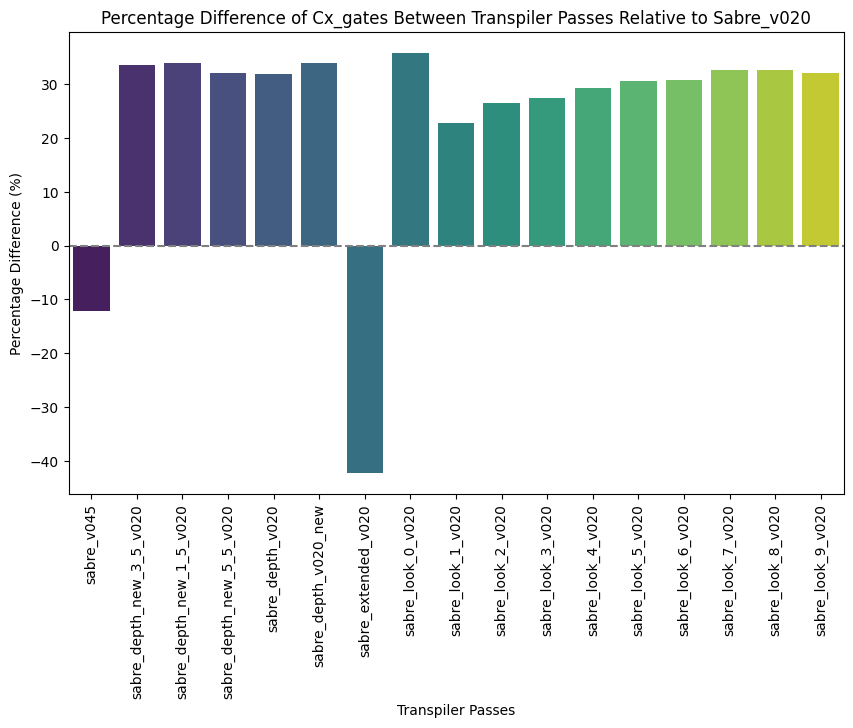

--- Num_gates Comparison ---
                     Dataset  Average Num_gates  Percentage Difference (%)
0   sabre_depth_new_1_5_v020         953.383333                  33.763488
1   sabre_depth_new_3_5_v020         950.858333                  33.409220
2   sabre_depth_new_5_5_v020         940.608333                  31.971104
3           sabre_depth_v020         939.158333                  31.767663
4       sabre_depth_v020_new         953.383333                  33.763488
5        sabre_extended_v020         412.333333                 -42.147987
6          sabre_look_0_v020         967.309524                  35.717388
7          sabre_look_1_v020         874.483333                  22.693503
8          sabre_look_2_v020         900.558333                  26.351929
9          sabre_look_3_v020         907.158333                  27.277936
10         sabre_look_4_v020         920.683333                  29.175547
11         sabre_look_5_v020         930.058333                  30.490

/var/folders/jt/44gl1rhd26v6ykt0frqzl87r0000gn/T/ipykernel_45347/1874323551.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')


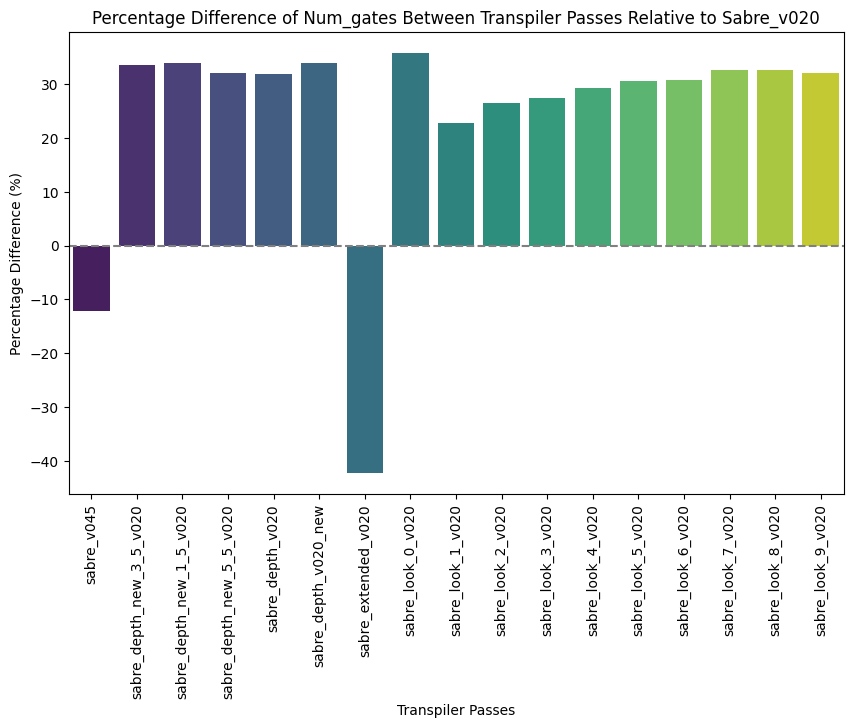

In [7]:
# Swapping the placement of the second and third bar in the adjusted bar graphs

for attribute in avg_results:
    avg_comparison = pd.DataFrame(avg_results[attribute], columns=['Dataset', f'Average {attribute.capitalize()}', 'Percentage Difference (%)'])
    print(f"--- {attribute.capitalize()} Comparison ---")
    print(avg_comparison)
    print("\n")

    # Reordering the dataset so that the last one is now first and then swapping the second and third bars
    reordered_comparison = avg_comparison.sort_values('Dataset')
    reordered_comparison = pd.concat([reordered_comparison.iloc[-1:], reordered_comparison.iloc[:-1]])
    reordered_comparison.iloc[[1, 2]] = reordered_comparison.iloc[[2, 1]].values

    # Plotting with the newly adjusted order
    plt.figure(figsize=(10, 6))
    sns.barplot(data=reordered_comparison, x='Dataset', y='Percentage Difference (%)', palette='viridis')
    plt.title(f'Percentage Difference of {attribute.capitalize()} Between Transpiler Passes Relative to Sabre_v020')
    plt.xlabel('Transpiler Passes')
    plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
    plt.ylabel('Percentage Difference (%)')
    plt.axhline(0, color='gray', linestyle='--')  # Horizontal line at x = 0
    plt.show()
